In [43]:
import json
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
file_path = "data/laureates-1000.json"

In [3]:
with open(file_path, 'r') as file:
    data = json.load(file)

In [4]:
laureates = data['laureates']

In [35]:
# Create a list to hold just the names of the laureates
laureate_names = []

In [37]:
# Iterate over each laureate to extract the name
for laureate in data['laureates']:
    known_name = laureate.get('knownName', {})
    if known_name:  # Ensuring known_name is not empty
        # Prefer English name if available
        name = known_name.get('en') or list(known_name.values())[0]
        for prize in laureate.get('nobelPrizes', []):
            category = prize.get('category', {})
            if category:
                category = category.get('en', 'unknown')
            if category in ['Literature', 'Peace']:
                continue
            laureate_names.append(name)

In [38]:
len(laureate_names)

739

In [39]:

laureate_names_no_sir = list(map(lambda name: name[4:] if name.startswith('Sir ') else name, laureate_names))

In [41]:
# Extract just the first name of each laureate
first_names = list(map(lambda name: name.split()[0], laureate_names_no_sir))

In [42]:
first_names[:5]

['A.', 'Aage', 'Aaron', 'Aaron', 'Abdus']

In [44]:
# Count the occurrences of each first name
first_name_counts = Counter(first_names)

In [49]:
# Get the top ten most common first names
top_ten_first_names = first_name_counts.most_common(10)

In [64]:
top_ten_first_names

[('Robert', 27),
 ('John', 25),
 ('Paul', 17),
 ('George', 16),
 ('William', 16),
 ('James', 15),
 ('Richard', 15),
 ('Charles', 10),
 ('Peter', 10),
 ('David', 9)]

In [50]:
# Separate the names and their counts for plotting
names, counts = zip(*top_ten_first_names)

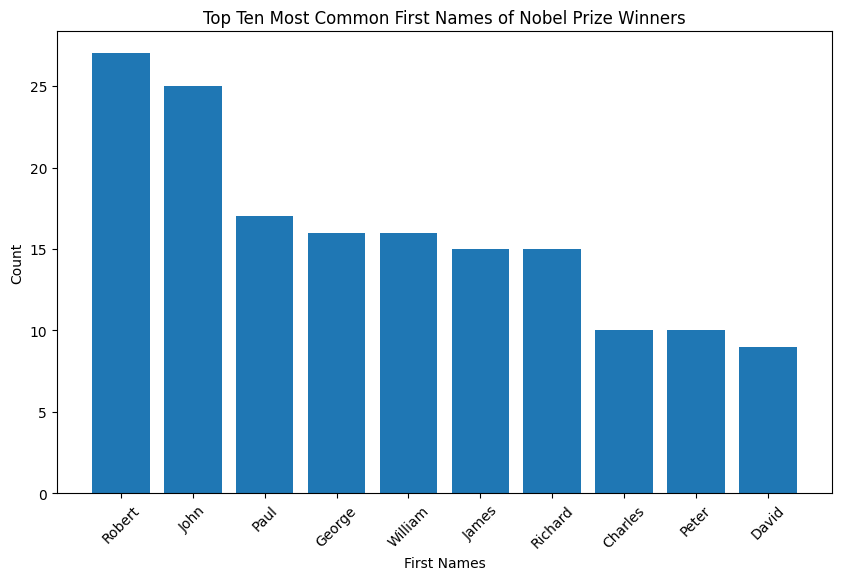

In [52]:
# Create a bar chart for the top ten first names
plt.figure(figsize=(10, 6))
plt.bar(names, counts)
plt.xlabel('First Names')
plt.ylabel('Count')
plt.title('Top Ten Most Common First Names of Nobel Prize Winners')
plt.xticks(rotation=45)
plt.show()

In [54]:
# Extract just the first letter of each laureate
first_letters = list(map(lambda name: name[0], laureate_names_no_sir))

In [56]:
first_letter_counts = Counter(first_letters)

In [61]:
top_ten_first_letters = first_letter_counts.most_common(10)

In [65]:
top_ten_first_letters

[('J', 82),
 ('R', 72),
 ('A', 68),
 ('G', 45),
 ('M', 43),
 ('E', 42),
 ('H', 42),
 ('P', 42),
 ('C', 37),
 ('W', 37)]

In [62]:
# Separate the names and their counts for plotting
letters, letter_counts = zip(*top_ten_first_letters)

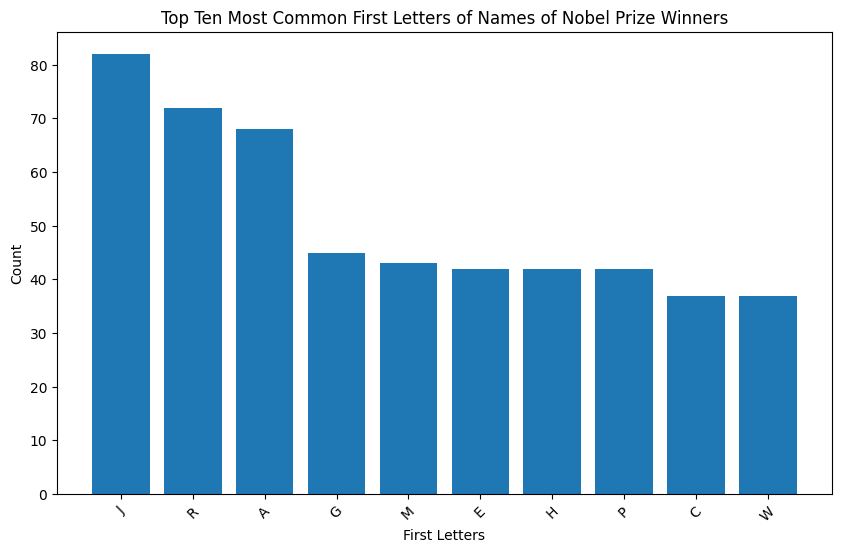

In [63]:
# Create a bar chart for the top ten first names
plt.figure(figsize=(10, 6))
plt.bar(letters, letter_counts)
plt.xlabel('First Letters')
plt.ylabel('Count')
plt.title('Top Ten Most Common First Letters of Names of Nobel Prize Winners')
plt.xticks(rotation=45)
plt.show()